In [17]:
from skimage.exposure import rescale_intensity
import numpy as np
import cv2
import matplotlib.pyplot as plt


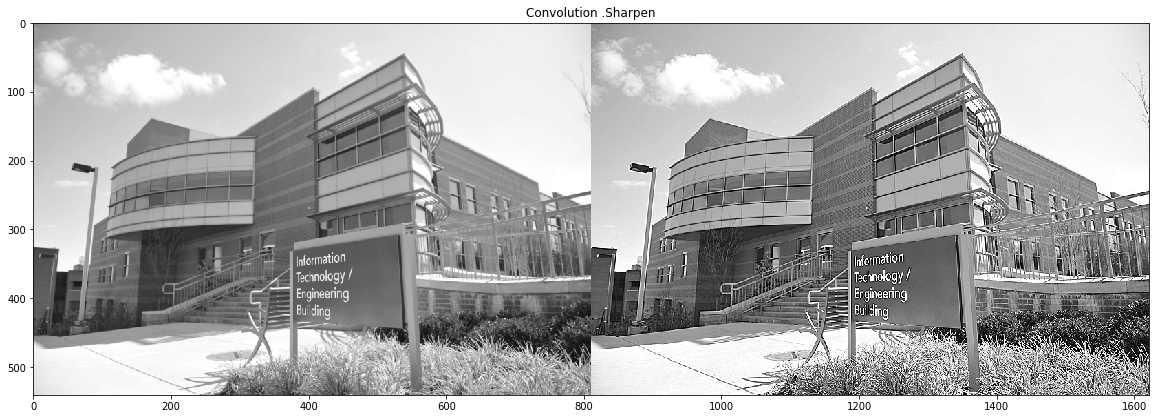

In [18]:
sharpen=np.array(([0,-1,0],[-1,5,-1],[0,-1,0]), dtype='int')
image=cv2.imread('../images/umbc.png')
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
opencvOutput_s=cv2.filter2D(gray,-1,sharpen)

con=np.concatenate((gray,opencvOutput_s), axis=1)
plt.figure(figsize=(20,10))
plt.imshow(con, cmap='gray')
plt.title('Convolution .Sharpen')
plt.show()

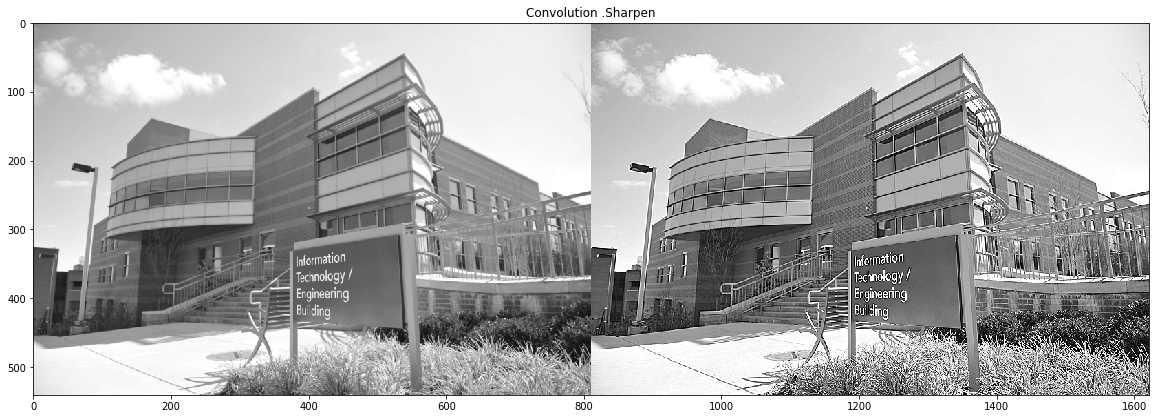

In [3]:
sharpen=np.array(([0,-1,0],[-1,5,-1],[0,-1,0]), dtype='int')
image=cv2.imread('../images/umbc.png')
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
opencvOutput_s=cv2.filter2D(gray,-1,sharpen)

con=np.concatenate((gray,opencvOutput_s), axis=1)
plt.figure(figsize=(20,10))
plt.imshow(con, cmap='gray')
plt.title('Convolution .Sharpen')
plt.show()

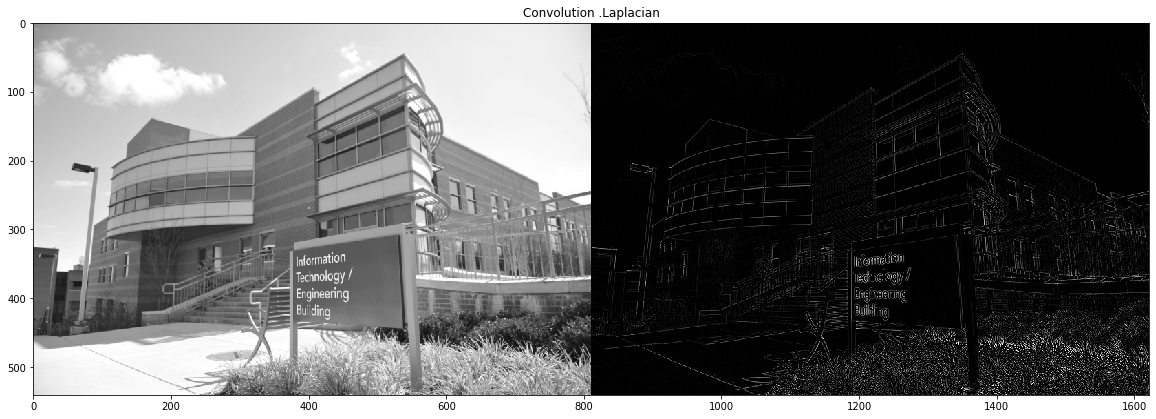

In [4]:
laplacian=np.array(([0,1,0],[1,-4,1],[0,1,0]), dtype='int')
image=cv2.imread('../images/umbc.png')
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
opencvOutput_l=cv2.filter2D(gray,-1,laplacian)

con=np.concatenate((gray,opencvOutput_l), axis=1)
plt.figure(figsize=(20,10))
plt.imshow(con, cmap='gray')
plt.title('Convolution .Laplacian')
plt.show()

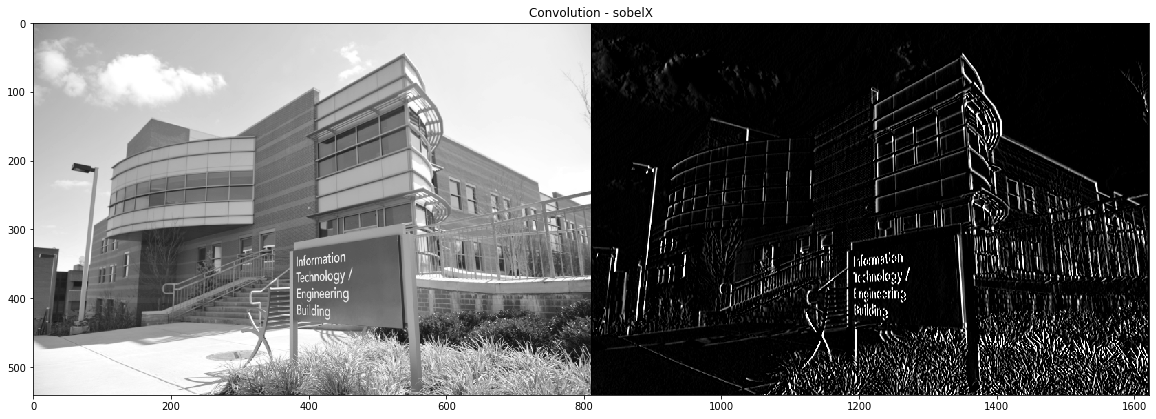

In [5]:
sobelX=np.array(([-1,0,1],[-2,0,2],[-1,0,1]), dtype='int')
image=cv2.imread('../images/umbc.png')
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
opencvOutput_sx=cv2.filter2D(gray,-1,sobelX)

con=np.concatenate((gray,opencvOutput_sx), axis=1)
plt.figure(figsize=(20,10))
plt.imshow(con, cmap='gray')
plt.title('Convolution - sobelX')
plt.show()

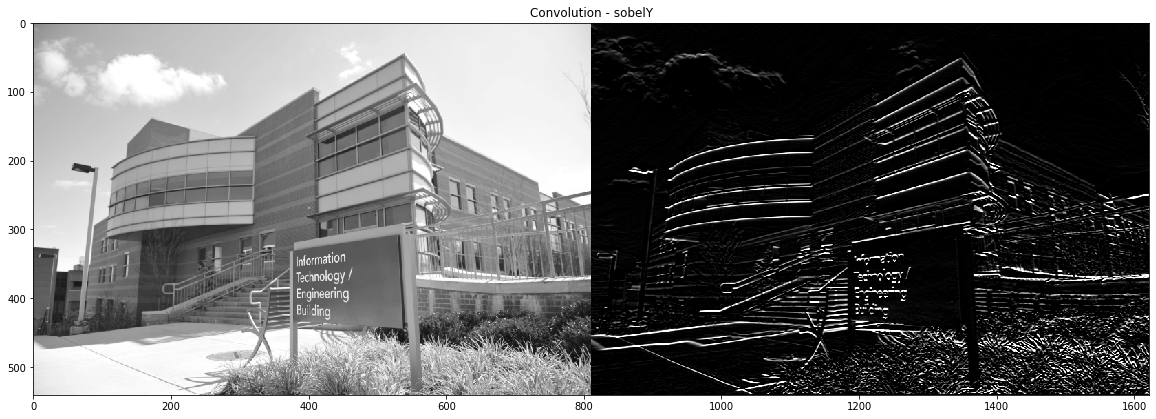

In [6]:
sobelY=np.array(([-1,-2,-1],[0,0,0],[1,2,1]), dtype='int')
image=cv2.imread('../images/umbc.png')
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
opencvOutput_sy=cv2.filter2D(gray,-1,sobelY)

con=np.concatenate((gray,opencvOutput_sy), axis=1)
plt.figure(figsize=(20,10))
plt.imshow(con, cmap='gray')
plt.title('Convolution - sobelY')
plt.show()

[[0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]]


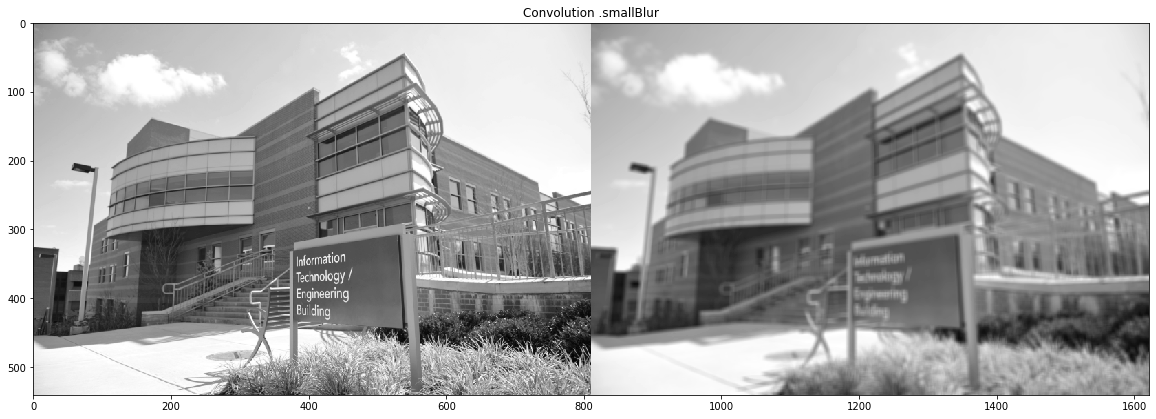

In [19]:
smallBlur=np.ones((7,7),dtype='float') * (1.0)/(7*7)
print(smallBlur)
image=cv2.imread('../images/umbc.png')
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
opencvOutput_sb=cv2.filter2D(gray,-1,smallBlur)

con=np.concatenate((gray,opencvOutput_sb), axis=1)
plt.figure(figsize=(20,10))
plt.imshow(con, cmap='gray')
plt.title('Convolution .smallBlur')
plt.show()

In [ ]:
largeBlur=np.ones((14,14),dtype='float') * (1.0)/(14*14)
print(largeBlur)
image=cv2.imread('../images/umbc.png')
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
opencvOutput_lb=cv2.filter2D(gray,-1,largeBlur)

con=np.concatenate((gray,opencvOutput_lb), axis=1)
plt.figure(figsize=(20,10))
plt.imshow(con, cmap='gray')
plt.title('Convolution .largeBur')
plt.show()

## Ejemplo de correlacion 2D o Correlacion cruzada

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.feature import match_template


(303, 384)


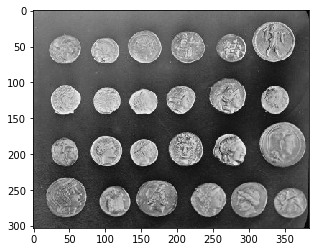

In [4]:
image=data.coins()
plt.imshow(image, cmap='gray')
print(image.shape)

(50, 55)


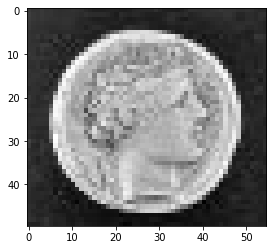

In [5]:
coin=image[170:220, 75:130]
plt.imshow(coin, cmap='gray')
print(coin.shape)

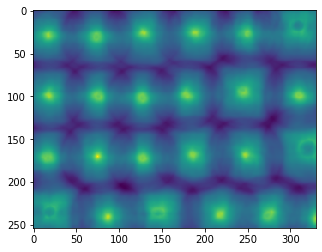

In [6]:
result=match_template(image,coin)
plt.imshow(result)


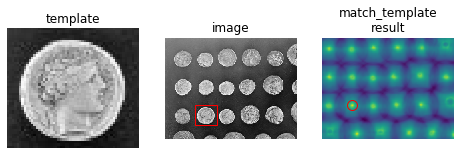

In [15]:
result=match_template(image,coin)
ij=np.unravel_index(np.argmax(result), result.shape)
x, y=ij[::-1]

fig = plt.figure(figsize=(8,3))
ax1=plt.subplot(1,3,1)
ax2=plt.subplot(1,3,2)
ax3=plt.subplot(1,3,3, sharex=ax2, sharey=ax2)

ax1.imshow(coin, cmap=plt.cm.gray)
ax1.set_axis_off()
ax1.set_title('template')

ax2.imshow(image, cmap=plt.cm.gray)
ax2.set_axis_off()
ax2.set_title('image')

#destacar el area

hcoin, wcoin = coin.shape
rect=plt.Rectangle((x, y), wcoin, hcoin, edgecolor='r', facecolor='none')
ax2.add_patch(rect)

ax3.imshow(result)
ax3.set_axis_off()
ax3.set_title('match_template\nresult')

#marcar region encontrada

ax3.autoscale(False)
ax3.plot(x,y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)

plt.show()